Prediction task is to determine whether a person makes over 50K a year. 


In [2]:
#code to load required libraries and data:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
%matplotlib inline 


# Load training and test data into corresponding dataframes

In [4]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',na_values="?")

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1,na_values="?")

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
train_set.shape,test_set.shape 

((32560, 15), (16280, 15))

# View training and test data sample

In [6]:
train_set.sample(4, random_state = 42) 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,38,Private,680390,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K
27047,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28867,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,51,Private,306108,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K


In [8]:
test_set.sample(4, random_state = 101) 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
8221,76,Self-emp-not-inc,106430,9th,5,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K.
12890,32,Private,233838,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,50,United-States,<=50K.
4430,24,Private,167316,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Female,0,0,30,United-States,<=50K.
4506,59,Private,32446,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K.


In [9]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
pd.DataFrame([train_set.dtypes, test_set.dtypes], index = ['train_set','test_set']).T 

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


# Find the columns having data types as object

In [12]:
for i in train_set.columns: 
    if train_set[i].dtypes == 'object':
        print(i)
      

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


### Checking the frequency of occurrence of different categorical values in the columns which have a datatype object

In [13]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
train_set.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

# Unique counts for the features

In [16]:
train_set.workclass.nunique(),train_set.education.nunique(),train_set.marital_status.nunique(),train_set.native_country.nunique()

(9, 16, 7, 42)

# Concatenate training datasets and test datasets into a common dataframe Sample

In [17]:
X_train = train_set.copy()
X_test = test_set.copy()


In [18]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [19]:
Sample = X_train.append(X_test)
Sample.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [20]:
Sample.describe() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
Sample.describe(include=['O']) 

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48840,48840,48840,48840,48840,48840,48840,48840,48840
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33905,15784,22379,6172,19716,41761,32648,43830,24719


In [22]:
def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') 
    fig = plt.figure(figsize=(width,height)) 
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) 
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    
    for i, column in enumerate(dataset.columns):
        # print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings) 
            plt.xticks(rotation=25) 
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) 
            plt.xticks(rotation=25) 
            #plt.show()


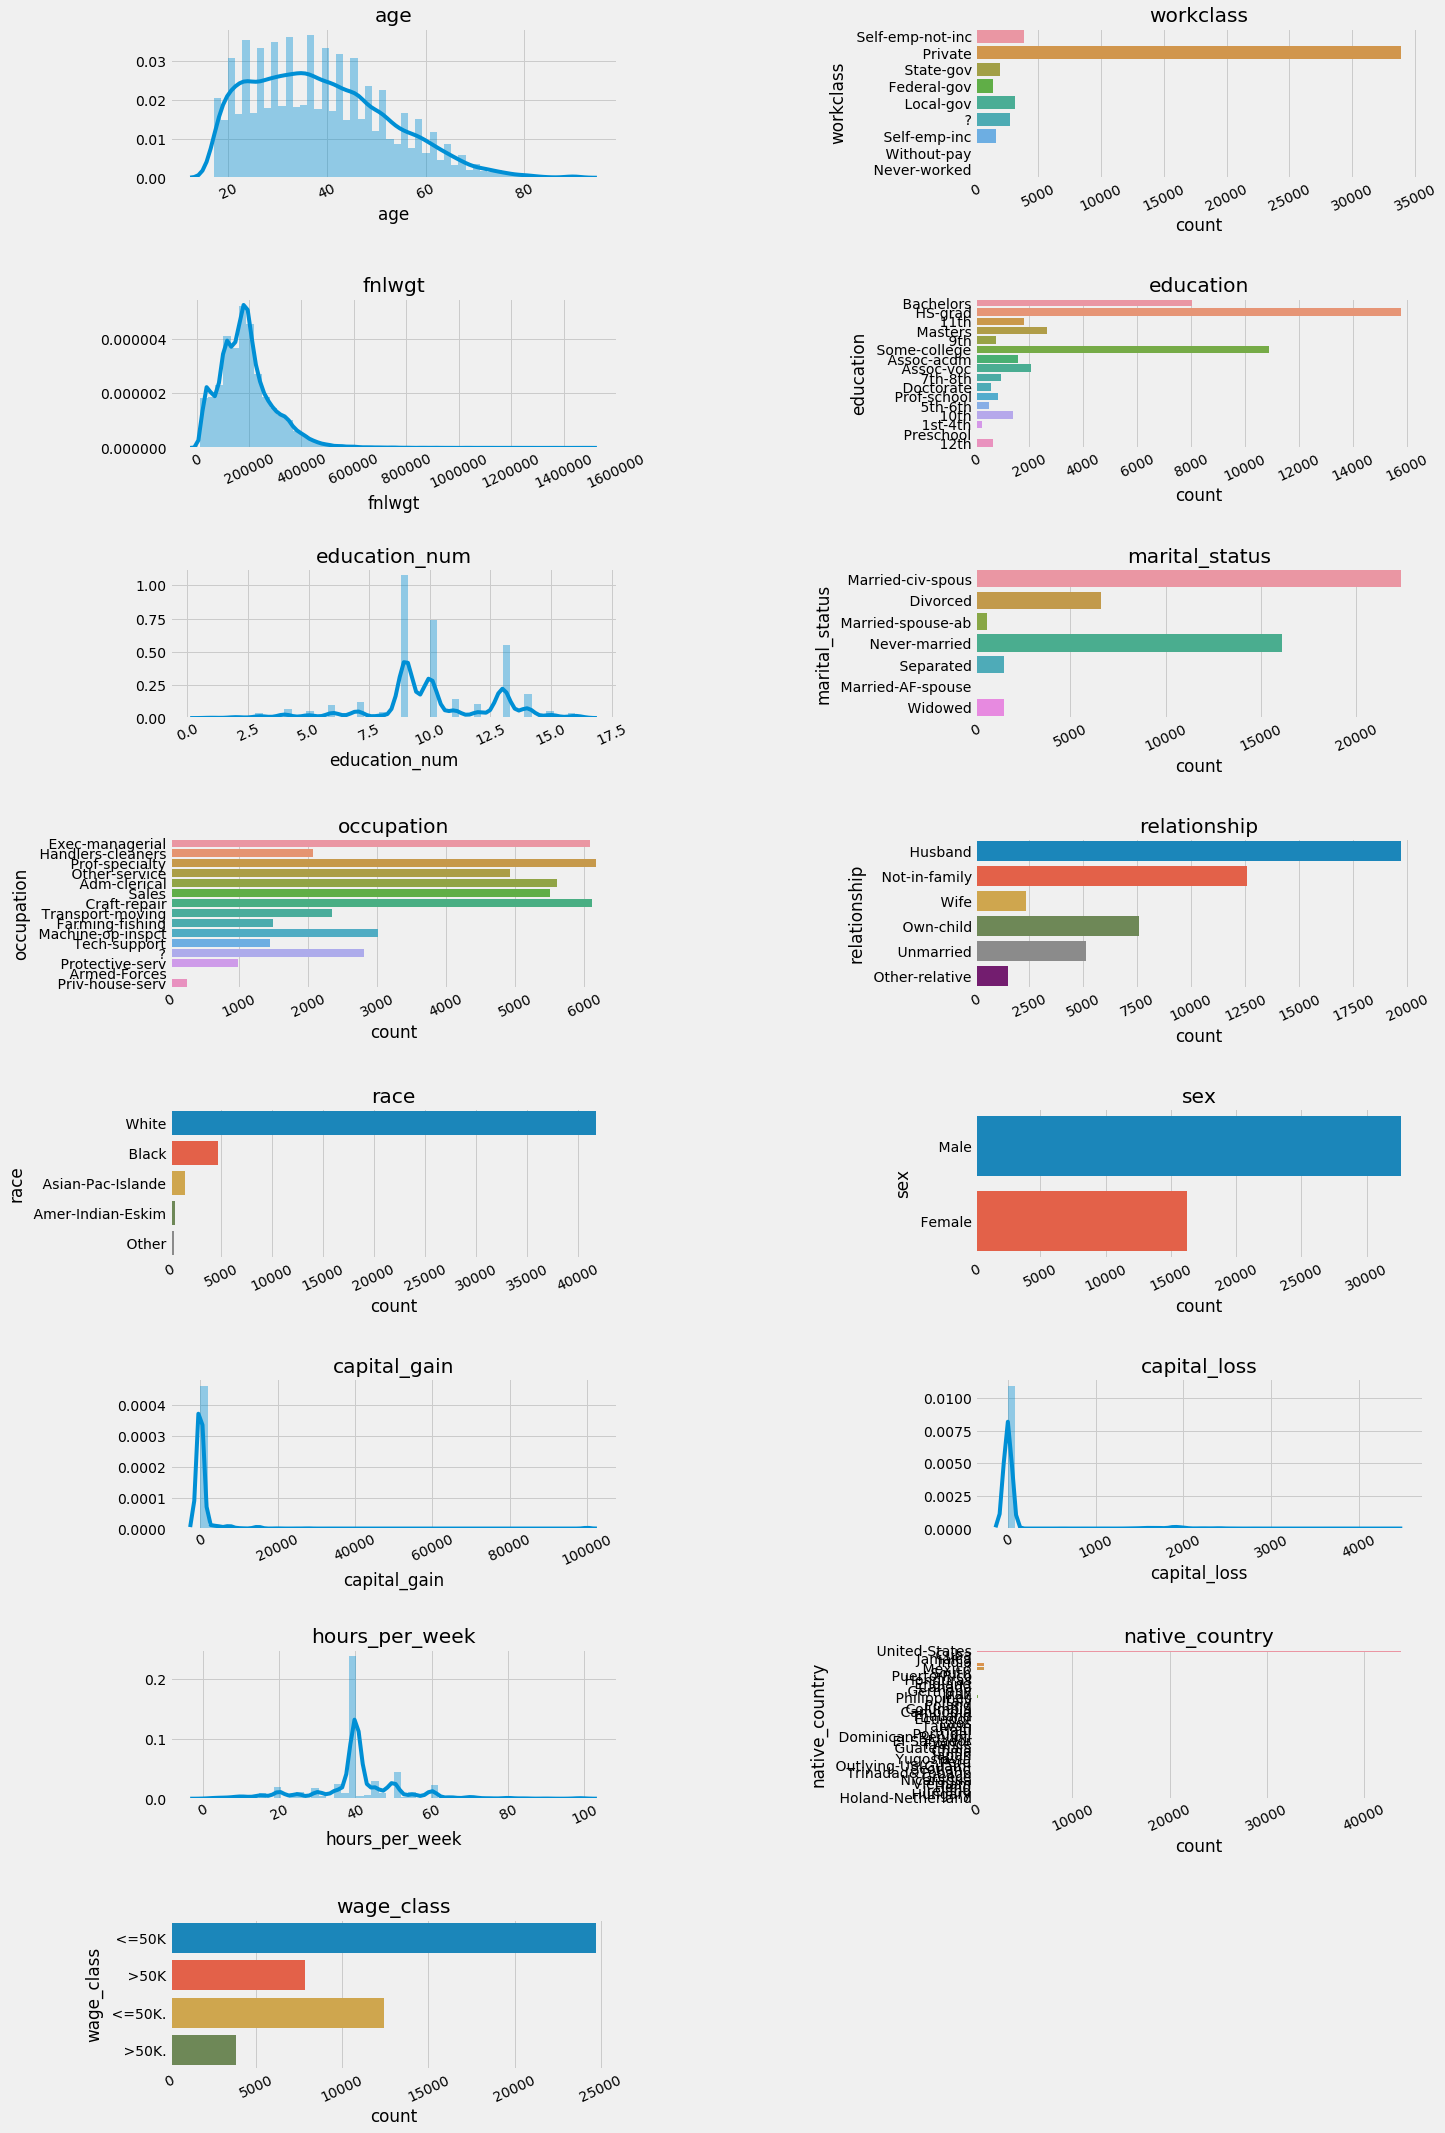

In [23]:
plot_distribution(Sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

In the figure above, the plot for Native country column is not clear. So, we'll plot it separately again

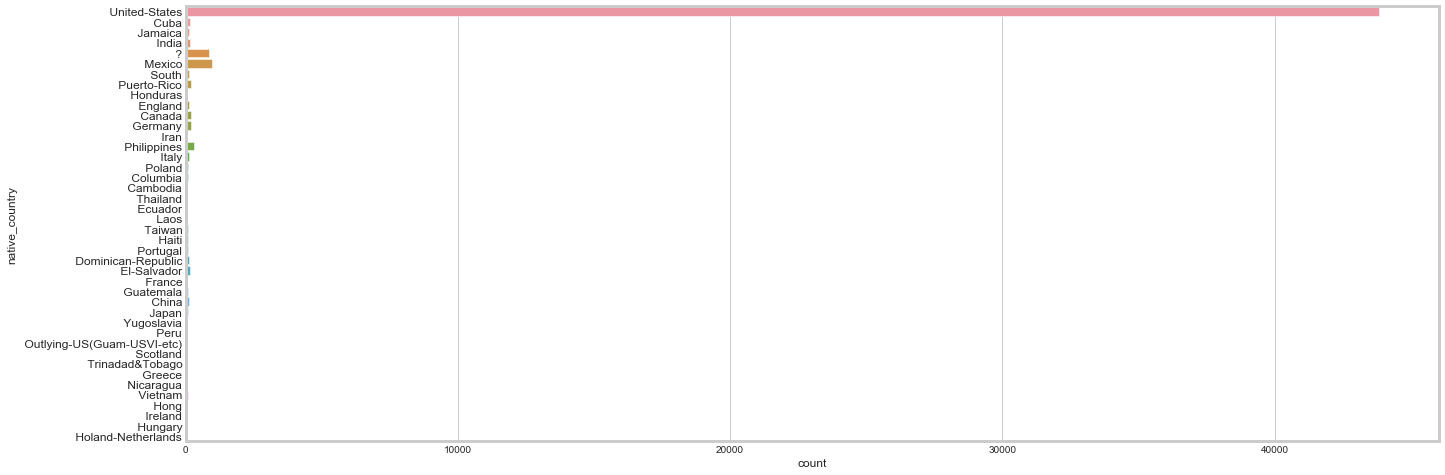

In [24]:
sns.set_style('whitegrid') 
%matplotlib inline
plt.figure(figsize=(20,8)) 
g = sns.countplot(y='native_country',data=Sample)

g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) 
plt.show()

# Eliminating irrelevant data vale ? from the traiining and test data set

In [25]:
# Replacing the '?' in the dataset with NaN
train_set = train_set.apply(lambda x : x.replace(' ?',np.nan))
test_set = test_set.apply(lambda x : x.replace(' ?',np.nan))

In [26]:
train_set.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [27]:
test_set.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [28]:
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [29]:
test_set.isnull().sum(),train_set.isnull().sum()

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64,
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64)

Finally, we have no NaN values in our dataset and we are good to proceed.

# Converting Categorical Values to Numerical Values

In [30]:
dict_sex = {}
count = 0
for i in X_train.sex.unique():
    dict_sex[i] = count
    count +=1
    
dict_sex

{' Male': 0, ' Female': 1}

In [31]:
dict_workclass ={}
count = 0
for i in X_train.workclass.unique():
    dict_workclass[i] = count
    count +=1
    
dict_workclass

{' Self-emp-not-inc': 0,
 ' Private': 1,
 ' State-gov': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [32]:
dict_education = {}
count = 0
for i in X_train.education.unique():
    dict_education[i] = count
    count +=1
    
dict_education

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [33]:
dict_marital_status = {}
count = 0
for i in X_train.marital_status.unique():
    dict_marital_status[i] = count
    count +=1
    
dict_marital_status

{' Married-civ-spouse': 0,
 ' Divorced': 1,
 ' Married-spouse-absent': 2,
 ' Never-married': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [34]:
dict_occupation = {}
count = 0
for i in X_train.occupation.unique():
    dict_occupation[i] = count
    count +=1
    
dict_occupation

{' Exec-managerial': 0,
 ' Handlers-cleaners': 1,
 ' Prof-specialty': 2,
 ' Other-service': 3,
 ' Adm-clerical': 4,
 ' Sales': 5,
 ' Craft-repair': 6,
 ' Transport-moving': 7,
 ' Farming-fishing': 8,
 ' Machine-op-inspct': 9,
 ' Tech-support': 10,
 ' ?': 11,
 ' Protective-serv': 12,
 ' Armed-Forces': 13,
 ' Priv-house-serv': 14}

In [35]:
dict_relationship = {}
count = 0
for i in X_train.relationship.unique():
    dict_relationship[i] = count
    count +=1
    
dict_relationship

{' Husband': 0,
 ' Not-in-family': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [36]:
dict_race = {}
count = 0
for i in X_train.race.unique():
    dict_race[i] = count
    count +=1
    
dict_race

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [38]:
dict_native_country ={}
count = 0
for i in X_train.native_country.unique():
    dict_native_country[i] = count
    count +=1
    
dict_native_country

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' ?': 4,
 ' Mexico': 5,
 ' South': 6,
 ' Puerto-Rico': 7,
 ' Honduras': 8,
 ' England': 9,
 ' Canada': 10,
 ' Germany': 11,
 ' Iran': 12,
 ' Philippines': 13,
 ' Italy': 14,
 ' Poland': 15,
 ' Columbia': 16,
 ' Cambodia': 17,
 ' Thailand': 18,
 ' Ecuador': 19,
 ' Laos': 20,
 ' Taiwan': 21,
 ' Haiti': 22,
 ' Portugal': 23,
 ' Dominican-Republic': 24,
 ' El-Salvador': 25,
 ' France': 26,
 ' Guatemala': 27,
 ' China': 28,
 ' Japan': 29,
 ' Yugoslavia': 30,
 ' Peru': 31,
 ' Outlying-US(Guam-USVI-etc)': 32,
 ' Scotland': 33,
 ' Trinadad&Tobago': 34,
 ' Greece': 35,
 ' Nicaragua': 36,
 ' Vietnam': 37,
 ' Hong': 38,
 ' Ireland': 39,
 ' Hungary': 40,
 ' Holand-Netherlands': 41}

In [39]:

dict_wage_class = {}
count = 0
for i in X_train.wage_class.unique():
    dict_wage_class[i] = count
    count +=1
    
dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [42]:

X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [43]:
# Mapping the categorical values against the corresponding numeric values for the respective columns for training dataset 

X_train['sex'] = X_train['sex'].map(dict_sex)
X_train['education'] = X_train['education'].map(dict_education)
X_train['wage_class'] = X_train['wage_class'].map(dict_wage_class)
X_train['native_country'] = X_train['native_country'].map(dict_native_country)
X_train['race'] = X_train['race'].map(dict_race)
X_train['occupation']=X_train['occupation'].map(dict_occupation)
X_train['marital_status'] = X_train['marital_status'].map(dict_marital_status)
X_train['workclass'] = X_train['workclass'].map(dict_workclass)
X_train['relationship'] = X_train['relationship'].map(dict_relationship)

In [44]:
# looking at the data after converting categorical columns to numerical ones
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


In [45]:
X_train.isnull().sum()  

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [46]:
X_train.describe() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.614619,1.897818e+05,3.424570,10.080590,1.458784,4.734275,1.392291,0.221714,0.330805,1077.615172,87.306511,40.437469,1.290356,0.240817
std,13.640642,1.490557,1.055498e+05,3.453582,2.572709,1.622263,3.329518,1.535159,0.627357,0.470510,7385.402999,402.966116,12.347618,5.045446,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178315e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783630e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370545e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [47]:
# Printing the counts of the individual values in the 'wage_class' column
print(X_train.wage_class.value_counts())
print(X_test.wage_class.value_counts())

0    24719
1     7841
Name: wage_class, dtype: int64
 <=50K.    12434
 >50K.      3846
Name: wage_class, dtype: int64


In [48]:

X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [49]:
# Mapping the categorical values against the corresponding numeric values for the respective columns for test dataset
X_test['sex'] = X_test['sex'].map(dict_sex)
X_test['education'] = X_test['education'].map(dict_education)
X_test['wage_class'] = X_test['wage_class'].map(dict_wage_class)
X_test['native_country'] = X_test['native_country'].map(dict_native_country)
X_test['race'] = X_test['race'].map(dict_race)
X_test['occupation']=X_test['occupation'].map(dict_occupation)
X_test['marital_status'] = X_test['marital_status'].map(dict_marital_status)
X_test['workclass'] = X_test['workclass'].map(dict_workclass)
X_test['relationship'] = X_test['relationship'].map(dict_relationship)

In [50]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,1,89814,1,9,0,8,0,0,0,0,0,50,0,NaN
1,28,4,336951,6,12,0,12,0,0,0,0,0,40,0,NaN
2,44,1,160323,5,10,0,9,0,1,0,7688,0,40,0,NaN
3,18,5,103497,5,10,3,11,3,0,1,0,0,30,0,NaN
4,34,1,198693,12,6,3,3,1,0,0,0,0,30,0,NaN


In [51]:
dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [52]:
X_test.describe()  

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16280.000000,16280.00000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.00000,16280.000000,16280.00000,16280.000000,16280.000000,16280.000000,0.0
mean,38.768305,1.62930,1.894334e+05,3.387039,10.073096,1.483354,4.791216,1.393182,0.21726,0.332985,1081.97156,87.904668,40.392260,1.241216,NaN
std,13.849192,1.50992,1.057177e+05,3.440813,2.567511,1.633460,3.375522,1.534425,0.62222,0.471296,7584.16416,403.117078,12.479715,4.942061,NaN
min,17.000000,0.00000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,NaN
25%,28.000000,1.00000,1.167162e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.00000,0.000000,40.000000,0.000000,NaN
50%,37.000000,1.00000,1.778295e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.00000,0.000000,0.00000,0.000000,40.000000,0.000000,NaN
75%,48.000000,1.00000,2.383840e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.00000,1.000000,0.00000,0.000000,45.000000,0.000000,NaN
max,90.000000,8.00000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.00000,1.000000,99999.00000,3770.000000,99.000000,40.000000,NaN


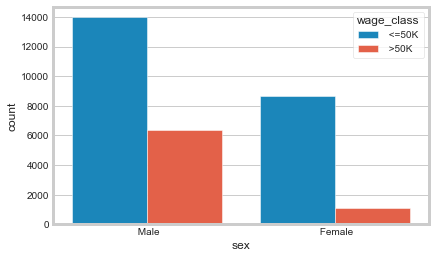

In [53]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) #Create a new figure
sns.set_style('whitegrid') 
%matplotlib inline
sns.countplot('sex',data=train_set,hue='wage_class') 


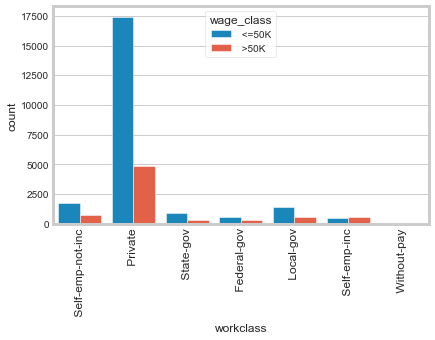

In [54]:
g = sns.countplot('workclass',data=train_set,hue='wage_class') # a countplot based on the workclass column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

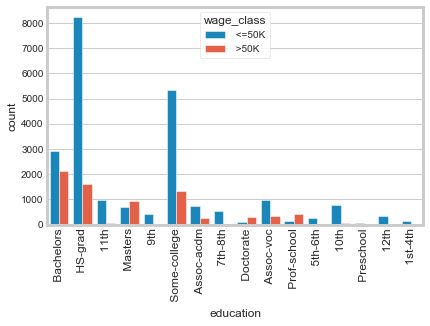

In [55]:
g = sns.countplot('education',data=train_set,hue='wage_class') # a countplot based on the Education column
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

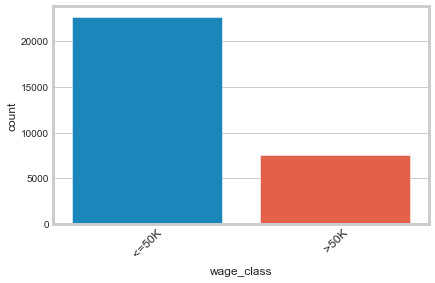

In [56]:
g = sns.countplot('wage_class',data=train_set) # a countplot based on the wage class column
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

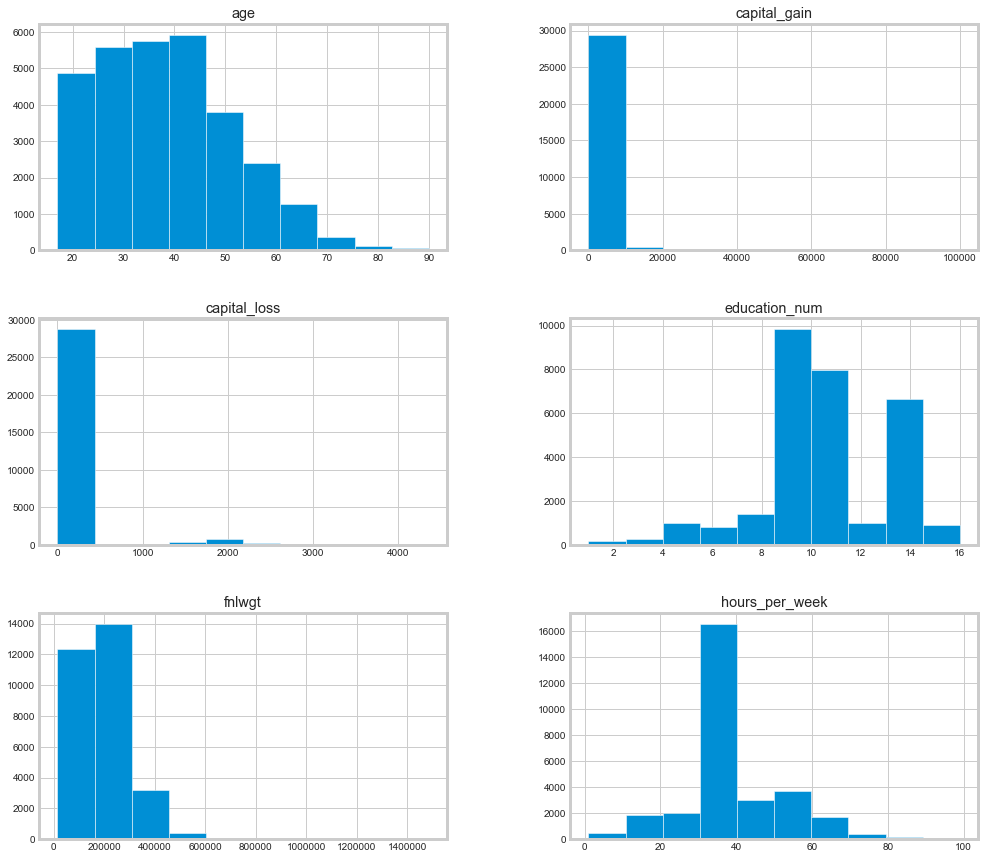

In [57]:
pd.DataFrame.hist(train_set,figsize = [15,15])
plt.show()